In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv('dataset.csv')
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.shape

(2000, 21)

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1386669238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


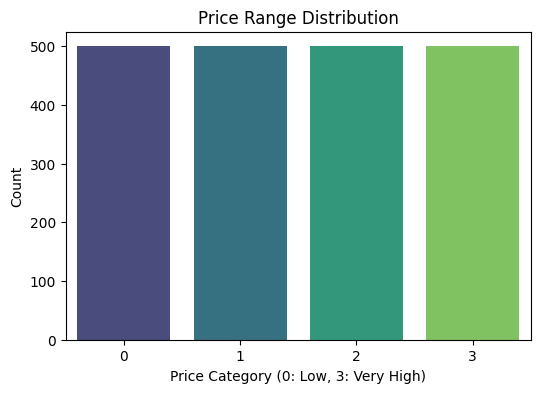

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Price Range Distribution')
plt.xlabel('Price Category (0: Low, 3: Very High)')
plt.ylabel('Count')
plt.show()


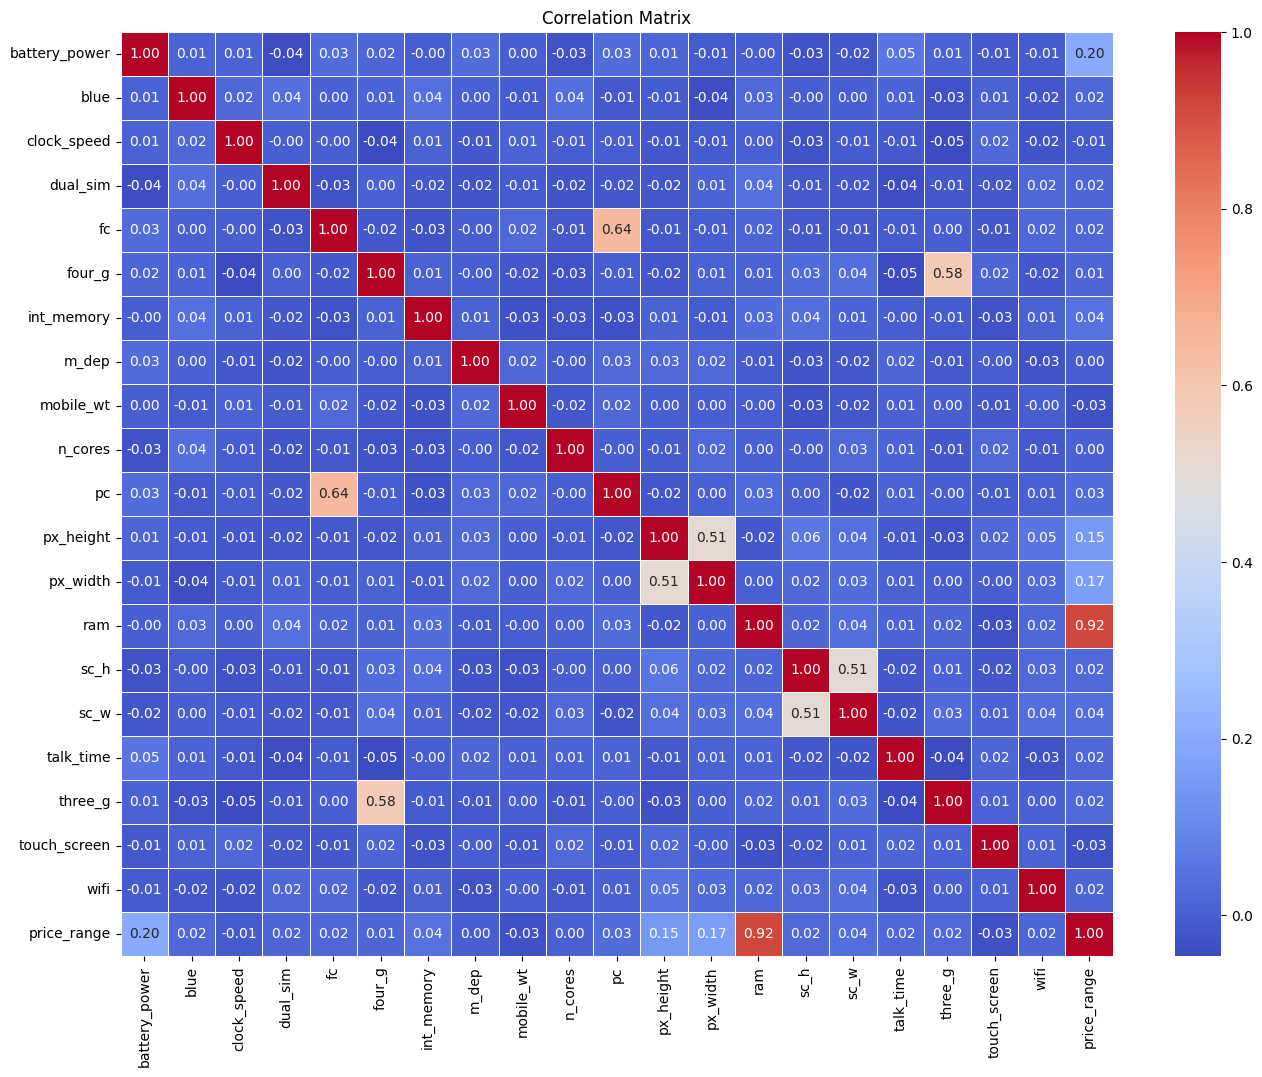

In [7]:
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


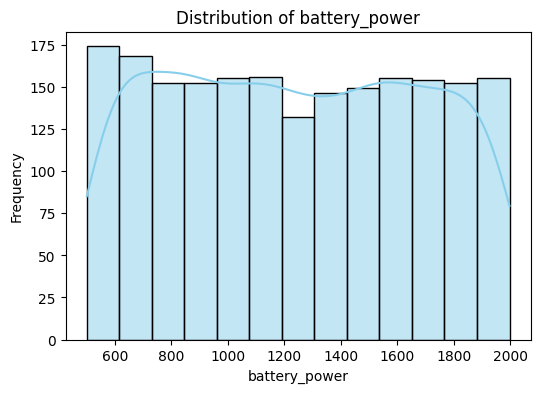

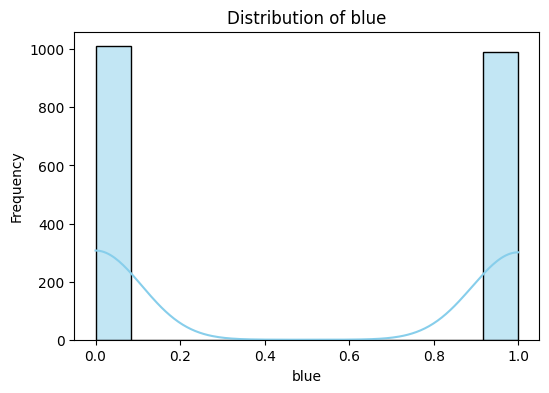

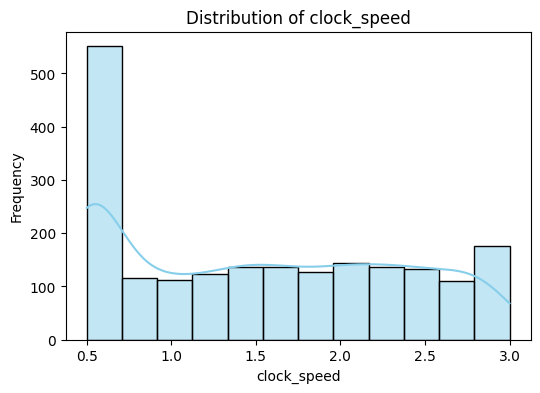

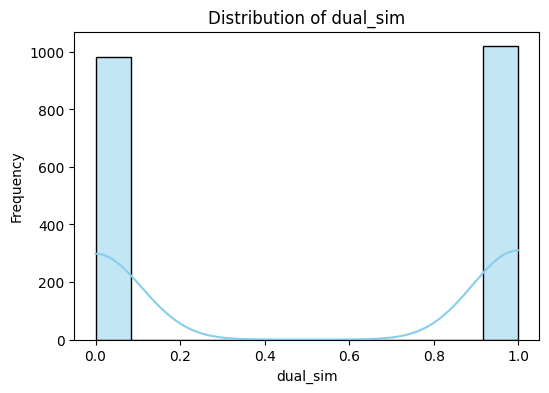

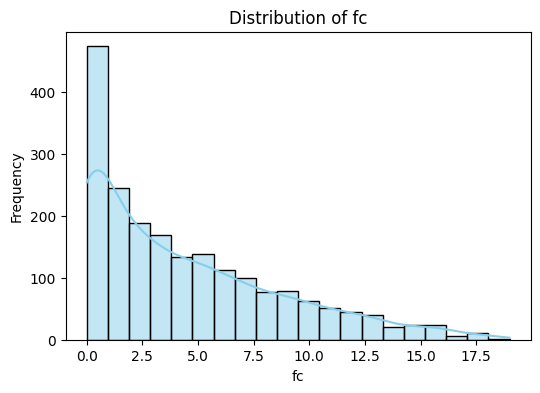

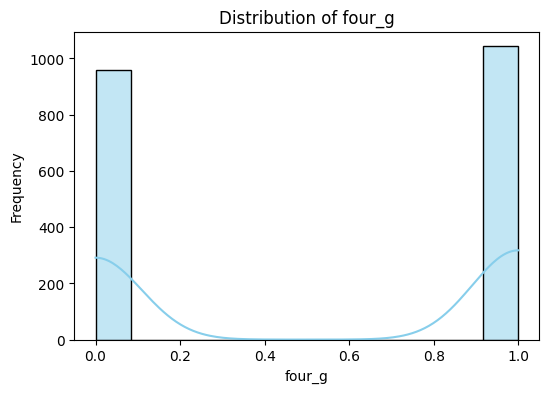

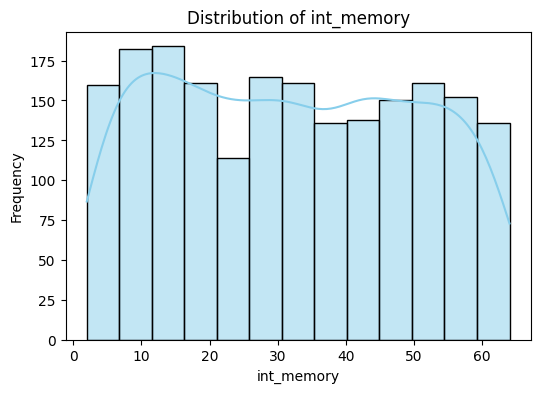

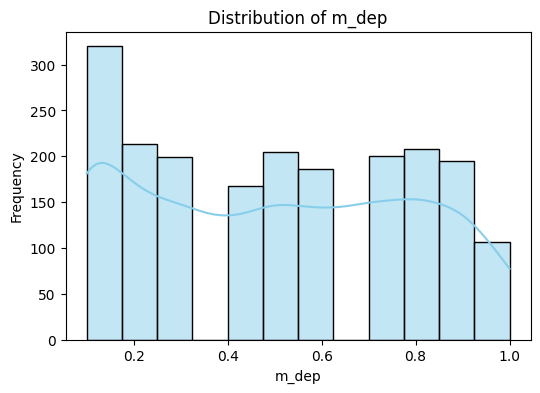

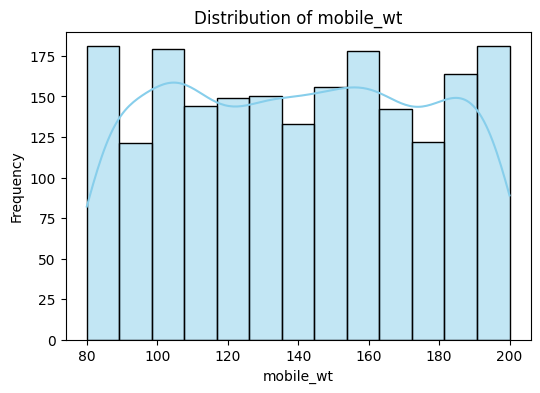

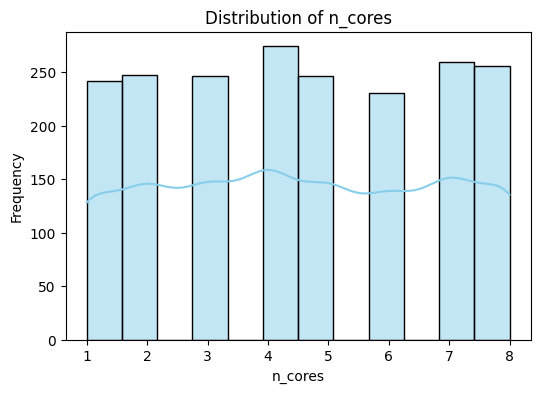

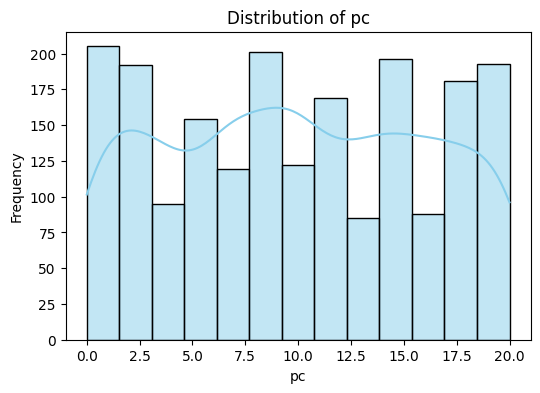

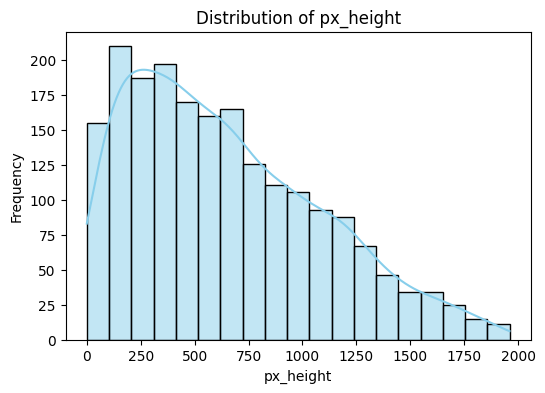

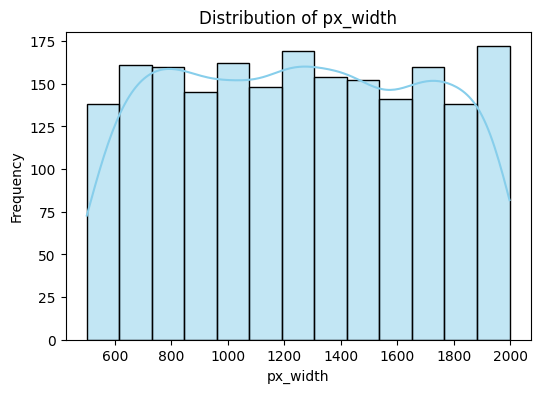

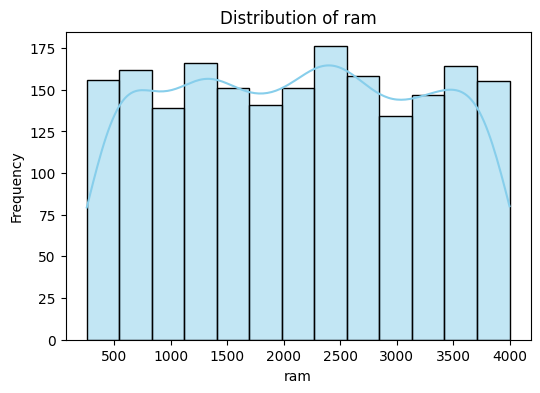

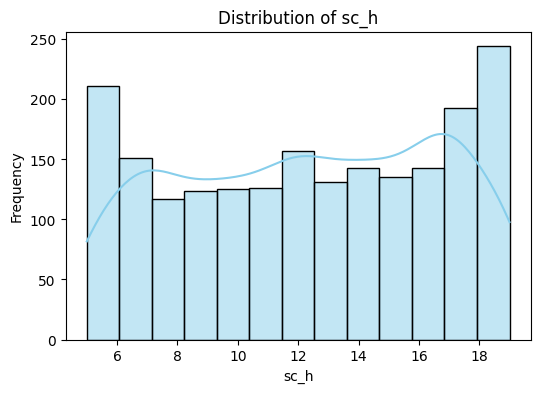

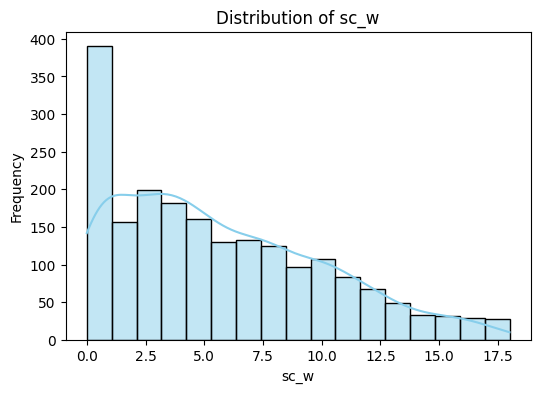

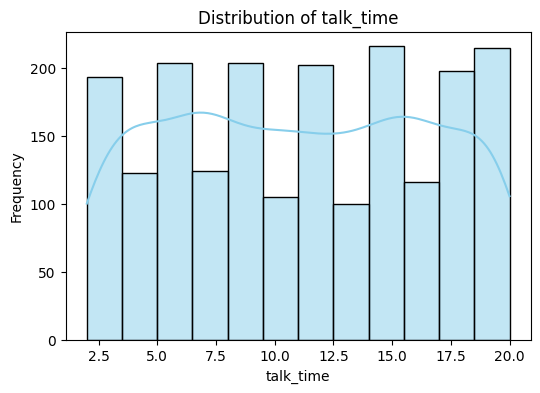

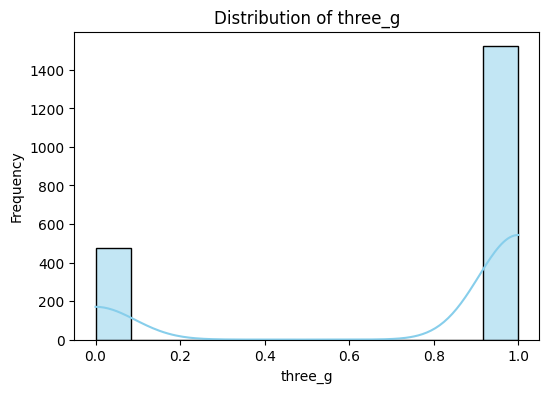

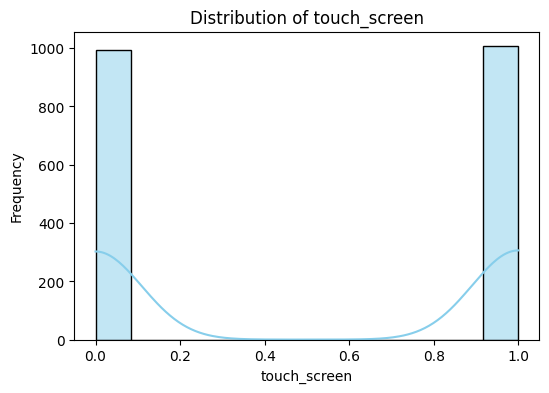

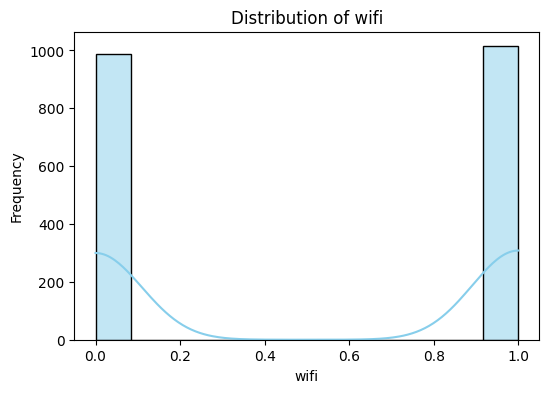

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('price_range')  # exclude target

# Plot distributions
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


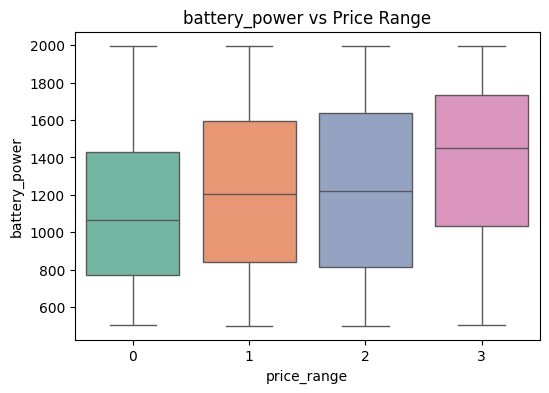

C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


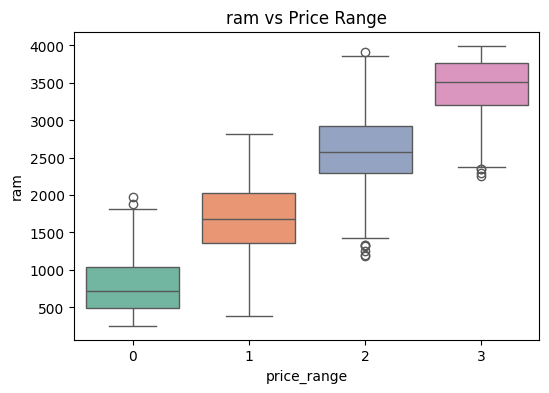

C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


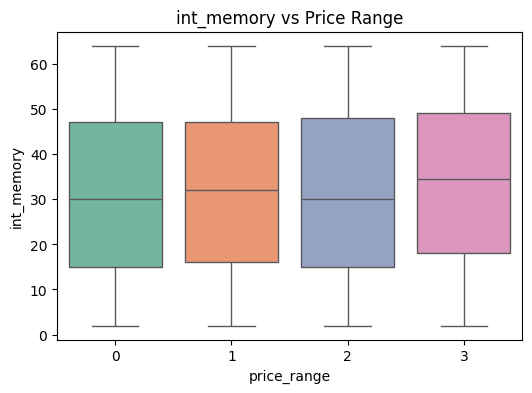

C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


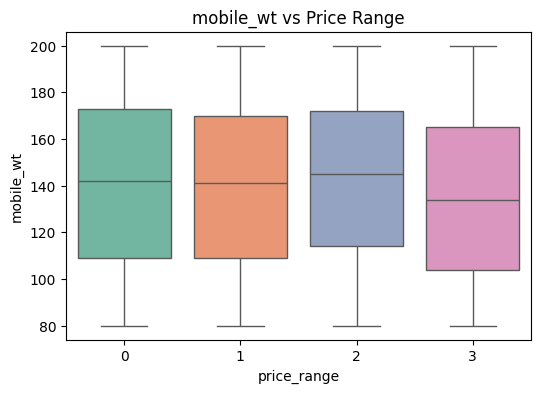

C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


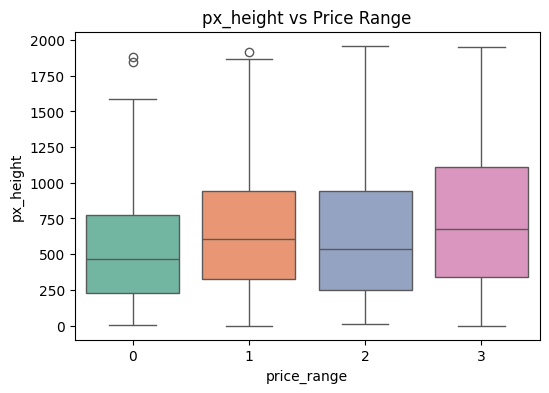

C:\Users\akalo\AppData\Local\Temp\ipykernel_5716\1023080340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y=col, data=df, palette='Set2')


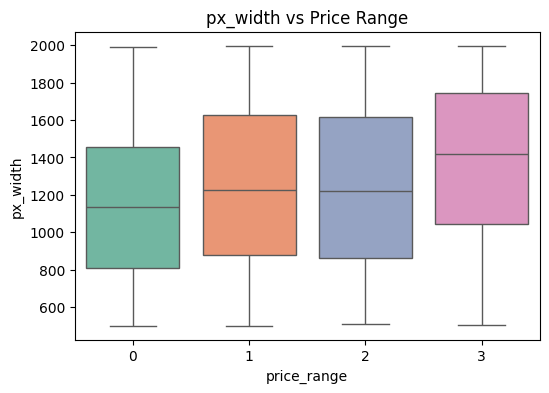

In [9]:
for col in ['battery_power', 'ram', 'int_memory', 'mobile_wt', 'px_height', 'px_width']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='price_range', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Price Range')
    plt.show()


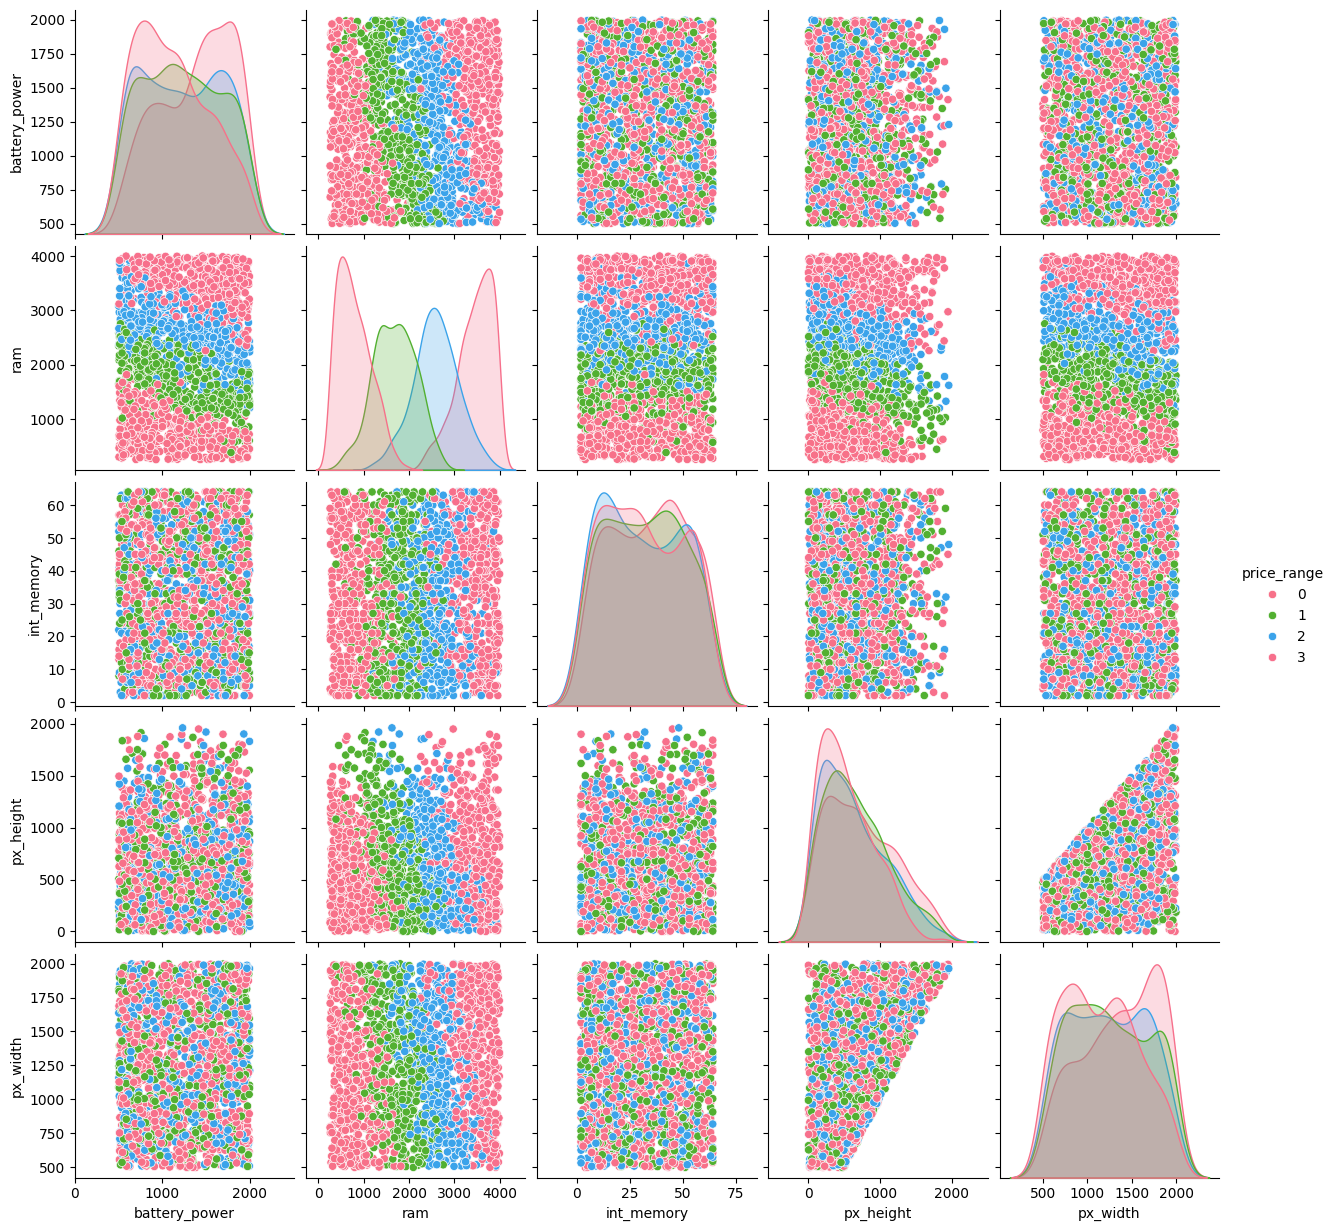

In [10]:
selected = ['battery_power', 'ram', 'int_memory', 'px_height', 'px_width', 'price_range']
sns.pairplot(df[selected], hue='price_range', palette='husl')
plt.show()


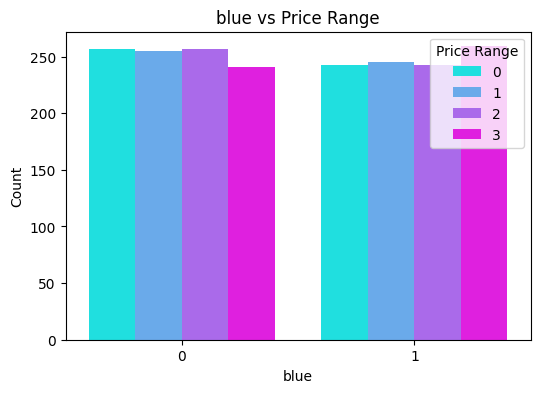

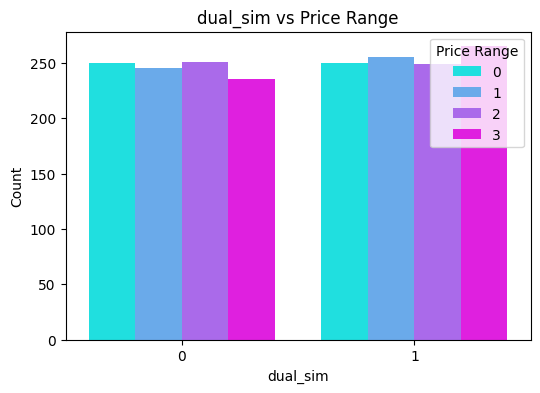

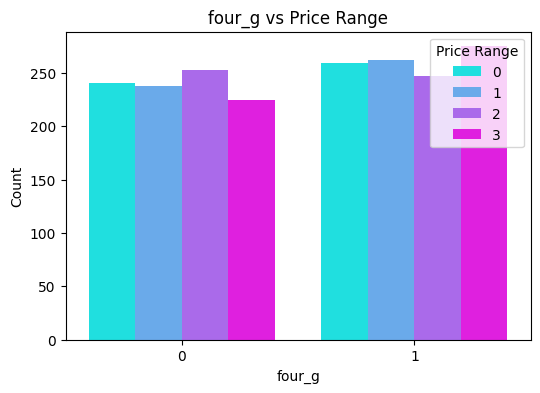

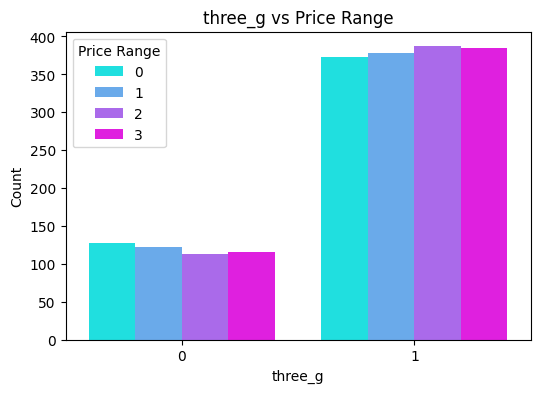

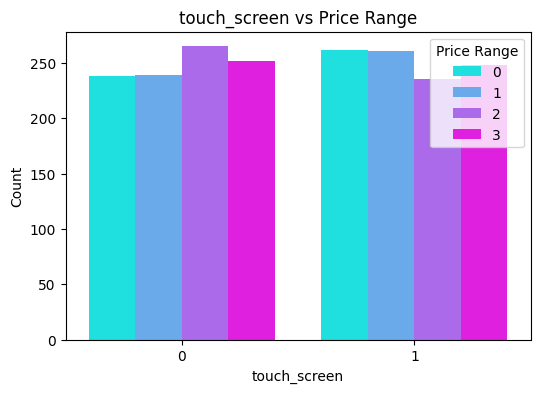

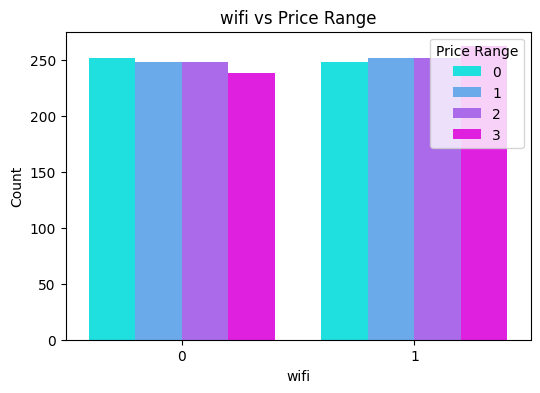

In [11]:
cat_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='price_range', data=df, palette='cool')
    plt.title(f'{col} vs Price Range')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Price Range')
    plt.show()


In [12]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

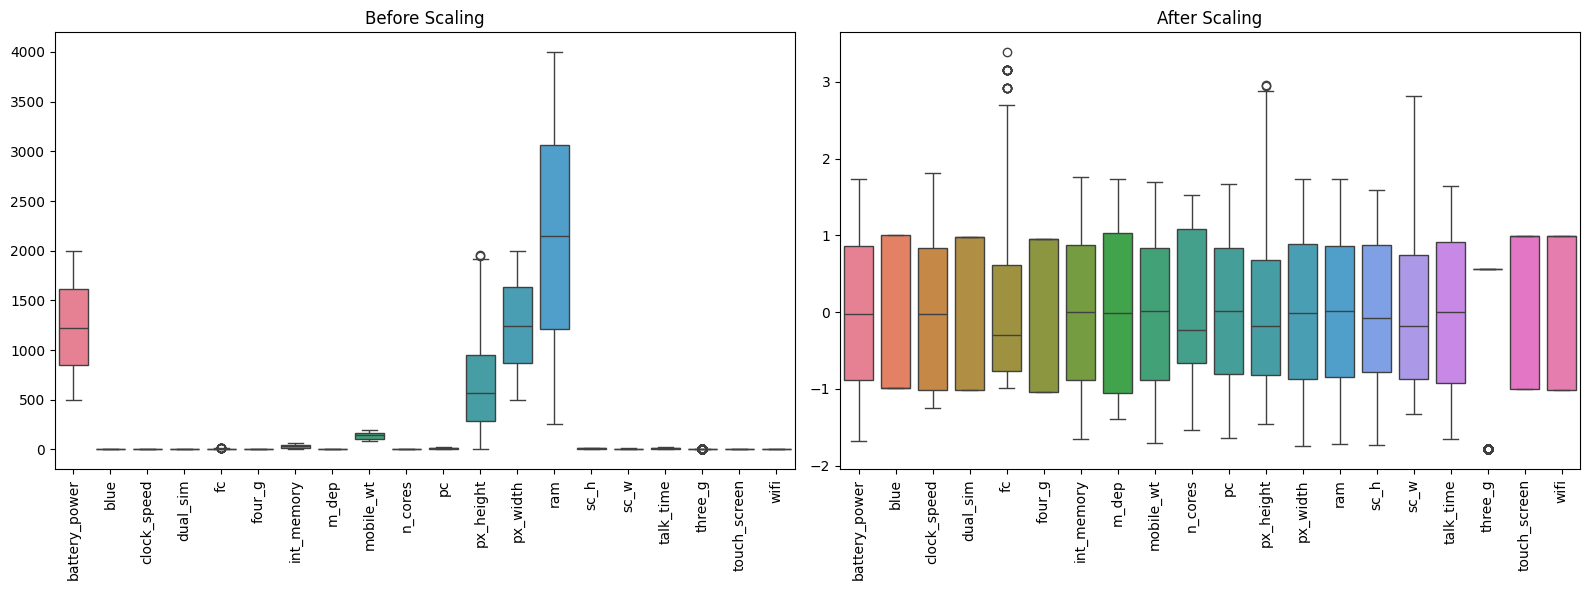

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title("Before Scaling")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled_df)
plt.title("After Scaling")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8775
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.91      0.92      0.92       100
           2       0.88      0.88      0.88       100
           3       0.95      0.92      0.93       100

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.89875


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.96   0.955  0.9675 0.965  0.9675]
Mean CV Accuracy: 0.9630000000000001


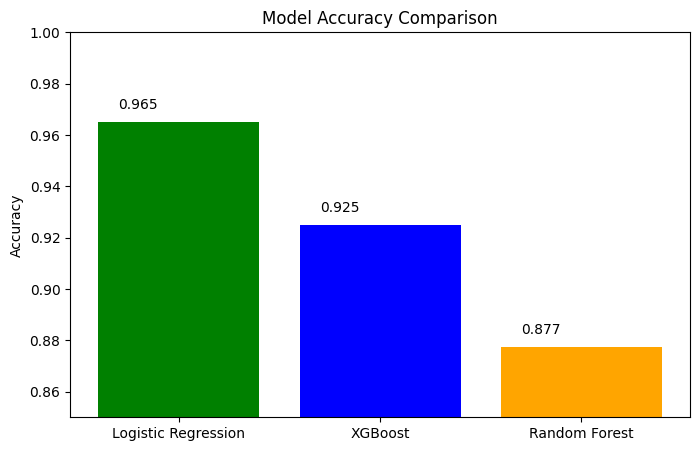

In [21]:
models = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracies = [0.965, 0.925, 0.8775]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['green', 'blue', 'orange'])
plt.ylim(0.85, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + 0.005, f"{yval:.3f}")

plt.show()


In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

vote_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=200)),
        ('xgb', XGBClassifier(n_estimators=250, learning_rate=0.1))
    ],
    voting='soft'
)

vote_clf.fit(X_train, y_train)
y_pred_vote = vote_clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))


Voting Classifier Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       0.94      0.94      0.94       100
           2       0.93      0.90      0.91       100
           3       0.96      0.96      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [24]:
import joblib
joblib.dump(vote_clf, 'best_mobile_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']